In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline
from functools import reduce # Inner join mais de 1 base de dados
import matplotlib.dates as mdates # Arrumar as datas no eixo

In [11]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')

In [12]:
campina_grande = df_teste.loc[df_teste['cidade'] == 'Santa Rita']
campina_grande.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
56,2020-04-07,Santa Rita,2,0,0,2,0
66,2020-04-08,Santa Rita,4,0,0,2,0
77,2020-04-09,Santa Rita,5,0,0,1,0
88,2020-04-10,Santa Rita,6,0,0,1,0
99,2020-04-11,Santa Rita,7,0,0,1,0


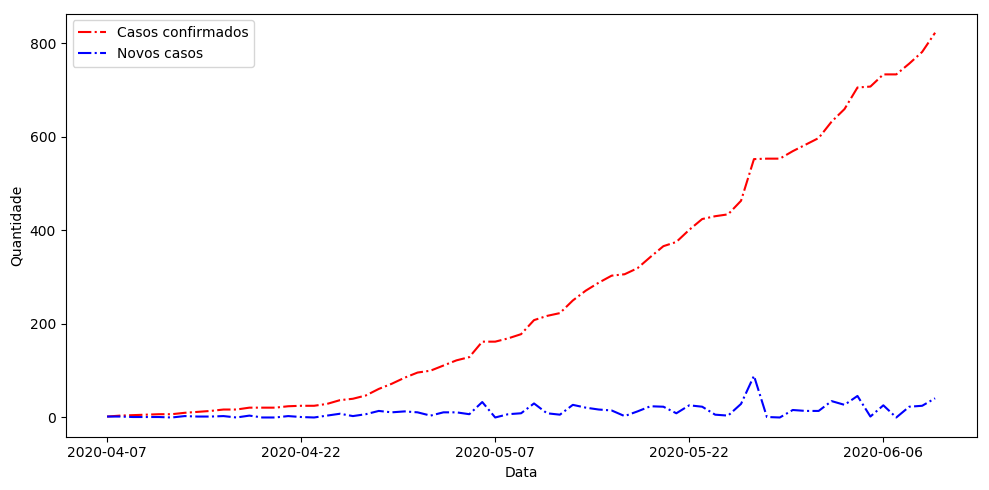

In [37]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots(dpi = 100)
ax.plot(campina_grande['data'], campina_grande['confirmados'], 'r-.', label = 'Casos confirmados')
ax.plot(campina_grande['data'],campina_grande['novos_casos'], 'b-.', label = 'Novos casos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('confirmados_sr.png')

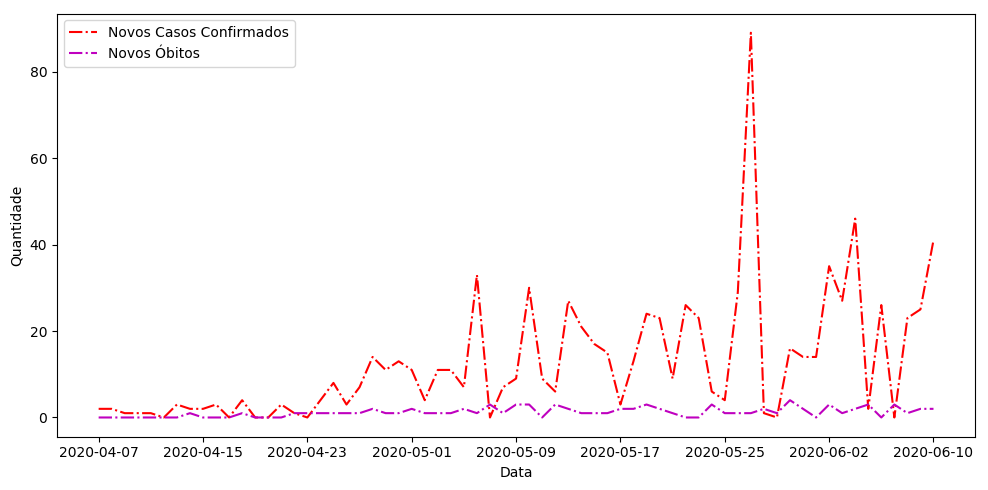

In [14]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots(dpi = 100)
ax.plot(campina_grande['data'], campina_grande['novos_casos'], 'r-.', label = 'Novos Casos Confirmados')
ax.plot(campina_grande['data'],campina_grande['novos_obitos'], 'm-.', label = 'Novos Óbitos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('novos_sr.png')

# Análise Regiões Metropolitanas

## Zona metropolitana de João Pessoa

In [15]:
df_teste = df_teste[['data','cidade','confirmados']]
pb = df_teste.loc[(df_teste['cidade'] == 'Paraíba')]

In [16]:
jp = df_teste.loc[(df_teste['cidade'] == 'João Pessoa')]
conde = df_teste.loc[((df_teste['cidade'] == 'Conde') )]
bayeux = df_teste.loc[(df_teste['cidade'] == 'Bayeux')]
lucena = df_teste.loc[(df_teste['cidade'] == 'Lucena')]
sr = df_teste.loc[(df_teste['cidade'] == 'Santa Rita')]
alhandra = df_teste.loc[(df_teste['cidade'] == 'Alhandra')]
rio_tinto = df_teste.loc[(df_teste['cidade'] == 'Rio Tinto')]
cruz_es = df_teste.loc[(df_teste['cidade'] == 'Cruz do Espírito Santo')]
pedras_de_fogo = df_teste.loc[(df_teste['cidade'] == 'Pedras de Fogo')]
caapora = df_teste.loc[ (df_teste['cidade'] == 'Caaporã')]
pitimbu = df_teste.loc[(df_teste['cidade'] == 'Pitimbu')]
cabedelo = df_teste.loc[(df_teste['cidade'] == 'Cabedelo')]

In [17]:
dfs = [jp,conde,bayeux,lucena,sr,alhandra,rio_tinto,cruz_es,pedras_de_fogo,caapora,pitimbu, cabedelo, pb]

zm_jp = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_jp.columns = ['data','cidade','c_jp','cidade','c_conde','cidade','c_b','cidade','c_lucena', 'cidade','c_sr',
                 'cidade','c_alhandra','cidade','c_rt', 'cidade','c_ces','cidade','c_pf','cidade','c_caa','cidade','c_pit', 'cidade','c_cabedelo', 'cidade','c_pb']

del zm_jp['cidade']

zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493


In [18]:
zm_jp['total_zona'] =  zm_jp.sum(axis=1) - zm_jp['c_pb']

In [19]:
zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034,819
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169,931
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219,955
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361,1068
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493,1156


In [20]:
zm_jp['participacao'] = zm_jp['total_zona']*100/zm_jp['c_pb']
zm_jp.tail()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona,participacao
36,2020-06-06,5918,135,469,93,733,193,95,133,347,467,139,1095,19787,9817,49.613383
37,2020-06-07,6004,135,476,93,733,194,97,136,351,480,139,1113,20310,9951,48.995569
38,2020-06-08,6246,140,479,93,756,194,98,139,355,492,140,1154,20951,10286,49.095509
39,2020-06-09,6583,148,501,93,781,204,101,140,403,509,171,1215,22452,10849,48.320862
40,2020-06-10,6905,155,525,97,822,209,133,142,487,523,171,1332,24032,11501,47.857024


## Zona Metropolitana de Campina Grande

In [21]:
cg = df_teste.loc[(df_teste['cidade'] == 'Campina Grande')]
puxinana = df_teste.loc[((df_teste['cidade'] == 'Puxinanã') )]
lagoa_seca = df_teste.loc[(df_teste['cidade'] == 'Lagoa Seca')]
massaranduba = df_teste.loc[(df_teste['cidade'] == 'Massaranduba')]
serra_redonda = df_teste.loc[(df_teste['cidade'] == 'Serra Redonda')]
itatuba = df_teste.loc[(df_teste['cidade'] == 'Itatuba')]
queimadas = df_teste.loc[(df_teste['cidade'] == 'Queimadas')]
boqueirao = df_teste.loc[(df_teste['cidade'] == 'Boqueirão')]
barra_santana = df_teste.loc[(df_teste['cidade'] == 'Barra de Santana')]
gado_bravo = df_teste.loc[(df_teste['cidade'] == 'Gado Bravo')]
aroeiras = df_teste.loc[(df_teste['cidade'] == 'Aroeiras')]
umbuzeiro = df_teste.loc[(df_teste['cidade'] == 'Umbuzeiro')]


In [22]:
dfs = [cg, puxinana, lagoa_seca, massaranduba,serra_redonda,itatuba,queimadas, boqueirao,barra_santana,gado_bravo,aroeiras, umbuzeiro, pb]

zm_cg = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_cg.columns = ['data','cidade','c_cg','cidade','c_pux','cidade','c_ls','cidade','c_massa', 'cidade','c_sr',
                 'cidade','c_ita','cidade','c_quei', 'cidade','c_boq','cidade','c_bs','cidade','c_gb','cidade','c_a', 'cidade','c_umbu', 'cidade','c_pb']

del zm_cg['cidade']

zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063


In [23]:
zm_cg["total_zona"] = zm_cg.sum(axis=1) - zm_cg['c_pb']
zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777,169
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045,194
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361,205
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739,317
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063,345


In [24]:
zm_cg['participacao'] = zm_cg['total_zona']*100/zm_cg['c_pb']
zm_cg.tail()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona,participacao
25,2020-06-06,2322,63,140,50,62,64,151,41,23,42,42,16,19787,3016,15.242331
26,2020-06-07,2473,64,143,50,63,66,153,43,23,42,42,17,20310,3179,15.652388
27,2020-06-08,2650,67,145,50,63,66,153,43,23,42,42,17,20951,3361,16.042194
28,2020-06-09,2967,70,177,59,66,67,167,48,28,42,44,17,22452,3752,16.711206
29,2020-06-10,3221,71,193,67,73,71,188,51,28,48,46,17,24032,4074,16.952397


## Zona Metropolitana Patos

In [25]:
patos = df_teste.loc[(df_teste['cidade'] == 'Patos')]
santa_teresinha = df_teste.loc[(df_teste['cidade'] == 'Santa Teresinha')]
condado = df_teste.loc[(df_teste['cidade'] == 'Condado')]
malta = df_teste.loc[(df_teste['cidade'] == 'Malta')]
santa_luzia = df_teste.loc[(df_teste['cidade'] == 'Santa Luzia')]
sjs = df_teste.loc[(df_teste['cidade'] == 'São José do Sabugi')]
js = df_teste.loc[(df_teste['cidade'] == 'Junco do Seridó')]
teixeira = df_teste.loc[(df_teste['cidade'] == 'Teixeira')]
mat = df_teste.loc[(df_teste['cidade'] == 'Maturéia')]

In [26]:
dfs = [patos, santa_teresinha, condado, malta, santa_luzia, sjs, js, teixeira, mat, pb]

zm_pt = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)


zm_pt.columns = ['data','cidade','c_pt','cidade','c_st','cidade','c_cond','cidade','c_malta', 'cidade','c_sl',
                 'cidade','c_sjs','cidade','c_js', 'cidade','c_tex','cidade','c_mat', 'cidade','c_pb']

del zm_pt['cidade']

zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb
26,2020-06-06,741,17,45,18,81,79,12,26,11,19787
27,2020-06-07,754,17,45,18,81,84,12,28,11,20310
28,2020-06-08,778,18,45,18,82,84,12,28,12,20951
29,2020-06-09,810,19,45,18,97,84,12,28,13,22452
30,2020-06-10,850,20,47,18,103,86,12,28,14,24032


In [27]:
zm_pt["total_zona"] = zm_pt.sum(axis=1) - zm_pt['c_pb']
zm_pt.head()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona
0,2020-05-11,109,1,11,1,1,2,3,1,1,2525,130
1,2020-05-12,128,1,14,1,1,2,3,1,1,2777,152
2,2020-05-13,138,1,14,2,4,2,3,1,1,3045,166
3,2020-05-14,174,1,14,2,4,2,3,1,1,3361,202
4,2020-05-15,219,1,20,4,4,2,3,1,1,3739,255


In [28]:
zm_pt['participacao'] = zm_pt['total_zona']*100/zm_pt['c_pb']
zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona,participacao
26,2020-06-06,741,17,45,18,81,79,12,26,11,19787,1030,5.205438
27,2020-06-07,754,17,45,18,81,84,12,28,11,20310,1050,5.169867
28,2020-06-08,778,18,45,18,82,84,12,28,12,20951,1077,5.140566
29,2020-06-09,810,19,45,18,97,84,12,28,13,22452,1126,5.015143
30,2020-06-10,850,20,47,18,103,86,12,28,14,24032,1178,4.901798


## Juntando Base de Dados

In [29]:
zm_jp = zm_jp[['data','participacao']]
zm_cg = zm_cg[['data','participacao']]
zm_pt = zm_pt[['data','participacao']]

In [30]:
dfs = [zm_jp,zm_cg,zm_pt]

zonas = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zonas.columns = ['data','part_jp','part_cg','part_pt']

zonas.tail()

,data,part_jp,part_cg,part_pt
25,2020-06-06,49.613383,15.242331,5.205438
26,2020-06-07,48.995569,15.652388,5.169867
27,2020-06-08,49.095509,16.042194,5.140566
28,2020-06-09,48.320862,16.711206,5.015143
29,2020-06-10,47.857024,16.952397,4.901798


In [36]:
zm_jp.tail(10)

,data,participacao
31,2020-06-01,51.383717
32,2020-06-02,50.938825
33,2020-06-03,50.643027
34,2020-06-04,50.622902
35,2020-06-05,49.862748
36,2020-06-06,49.613383
37,2020-06-07,48.995569
38,2020-06-08,49.095509
39,2020-06-09,48.320862
40,2020-06-10,47.857024


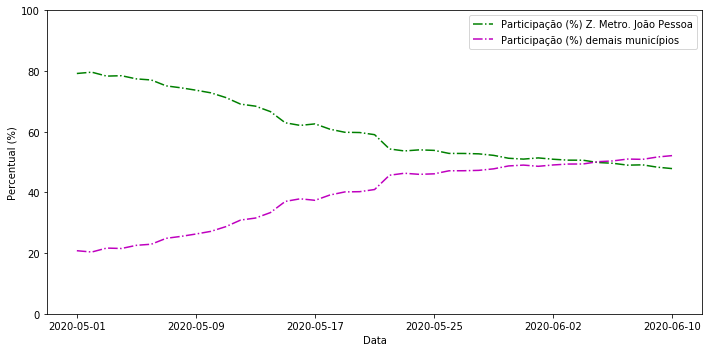

In [34]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots()
ax.plot(zm_jp['data'], zm_jp['participacao'], 'g-.', label = 'Participação (%) Z. Metro. João Pessoa')
ax.plot(zm_jp['data'], 100 - zm_jp['participacao'], 'm-.', label = 'Participação (%) demais municípios') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual (%)') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.ylim(0,100)
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'best')
plt.savefig('jp_resto.png')

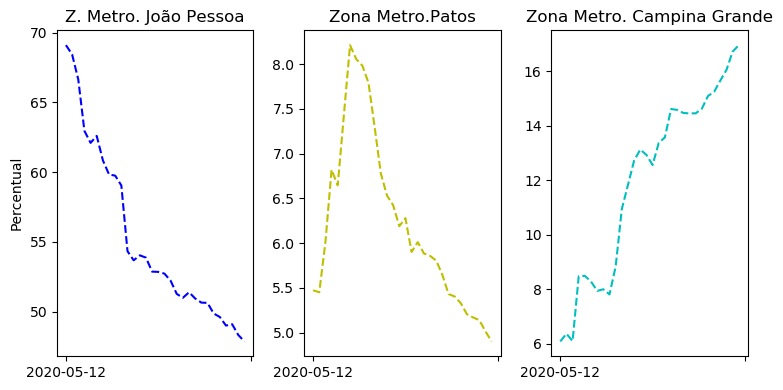

In [35]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100, nrows=1, ncols=3)

#João Pessoa
ax[0].set_title('Z. Metro. João Pessoa')
ax[0].plot(zonas['data'], zonas['part_jp'], 'b--')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label
ax[0].set_ylabel('Percentual')

# Patos
ax[1].set_title('Zona Metro.Patos')
ax[1].plot(zonas['data'], zonas['part_pt'], 'y--')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label

# CG
ax[2].set_title('Zona Metro. Campina Grande')
ax[2].plot(zonas['data'], zonas['part_cg'], 'c--')



ax[2].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label



plt.tight_layout() # Organiza o espaço

fig.savefig('prop_muni_cg.png')